These vector metrics are designed to help visualize the time evolution of the survey.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots

In [2]:
nside = 32

opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = '2DSlicers'
resultsDb = db.ResultsDb(outDir=outDir)
plotFuncs = [plots.TwoDMap()]

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database with no constraint.
Found 2469307 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.


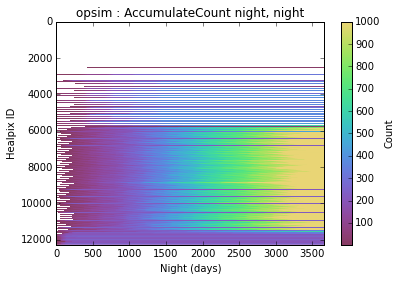

In [3]:
# Plot the total number of visits to each healpixel as a function of time
metric = metrics.AccumulateCountMetric(bins=np.arange(366*10))
slicer = slicers.HealpixSlicer(nside=nside, latCol='ditheredDec', lonCol='ditheredRA')
plotDict = {'colorMax':1000, 'xlabel':'Night (days)'}
sql=''
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs)
group = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir,
                                        resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


Querying database with no constraint.
Found 2469307 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.


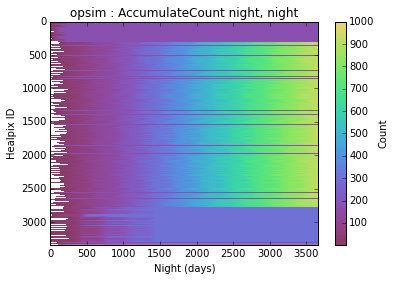

In [4]:
# Same as above, but now only using OpSim field IDs rather than healpixels
slicer = slicers.OpsimFieldSlicer()
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs)
group = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir,
                                        resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

Querying database with constraint night < 370
Found 275490 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 370 sqlconstraint now.
Plotting complete.


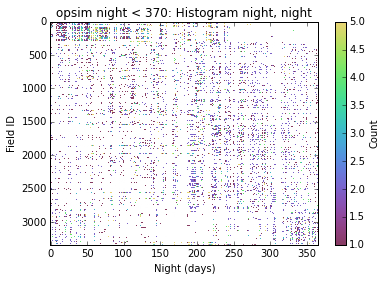

In [5]:
# Make a histogram of the number of visits per field per night in year 1
metric = metrics.HistogramMetric(bins=np.arange(367)-0.5)
slicer = slicers.OpsimFieldSlicer()
sql = 'night < 370'
plotDict = {'colorMin':1, 'colorMax':5, 'xlabel':'Night (days)'}
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs)
group = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir,
                                        resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


Querying database with constraint night < 370
Found 275490 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Found more than one value to be set for "xlim" in the plotDicts. Will reset to default value



Plotting figures with night < 370 sqlconstraint now.
Plotting complete.


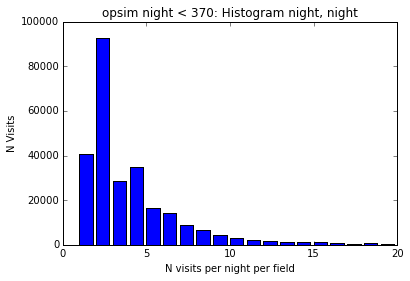

In [6]:
# Now, if we want to see the number of visit pairs, tripples, quads per night, we can just use a different plotter
plotters = [plots.VisitPairsHist()]
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotFuncs=plotters)
group = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir,
                                        resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database with constraint filter="r"
Found 544710 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.


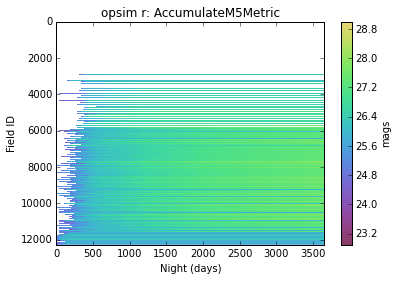

In [7]:
# Special metrics for computing the co-added depth as a function of time
metric = metrics.AccumulateM5Metric(bins=np.arange(365.25*10)-0.5)
slicer = slicers.HealpixSlicer(nside=nside)
sql = 'filter="r"'
plotDict = {'cbarTitle':'mags', 'xlabel':'Night (days)'}
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs)
group = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir,
                                        resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database with constraint filter="r"
Found 544710 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.


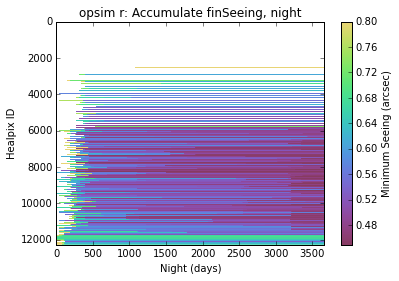

In [8]:
# Look at the minimum seeing as a function of time. 
# One could use this to feed a summary metric to calc when the entire sky has a good template image
# Or, what fraction of the sky has a good template after N years.
metric = metrics.AccumulateMetric(col='finSeeing', function=np.minimum,
                                 bins=np.arange(366*10))
slicer = slicers.HealpixSlicer(nside=nside, latCol='ditheredDec', lonCol='ditheredRA')
plotDict = {'xlabel':'Night (days)', 'cbarTitle':'Minimum Seeing (arcsec)', 'colorMax':0.8}
sql='filter="r"'
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs)
group = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir,
                                        resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


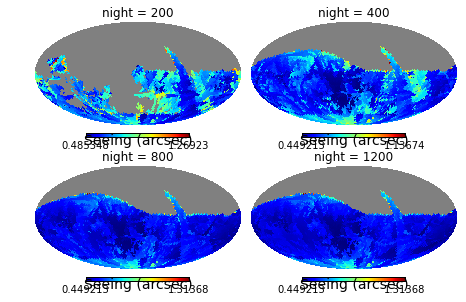

In [9]:
# Note that these are arrays of healpix maps, so it's easy to pull out a few and plot them all-sky
# I think this means it should be pretty easy to make a matplotlib animation without having to dump each plot to disk: https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
import healpy as hp
for i,night in zip(np.arange(4)+1,[200,400, 800,1200]):
    hp.mollview(bundle.metricValues[:,night], title='night = %i'%night, unit='Seeing (arcsec)', sub=(2,2,i))

Querying database with constraint filter="r"
Found 544710 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.


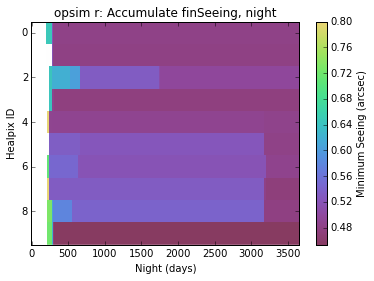

In [10]:
# Can use for just a few user-defined points
metric = metrics.AccumulateMetric(col='finSeeing', function=np.minimum,
                                 bins=np.arange(366*10))
ra = np.zeros(10.)+np.radians(10.)
dec = np.radians(np.arange(0,10)/9.*(-30))
slicer = slicers.UserPointsSlicer(ra,dec, latCol='ditheredDec', lonCol='ditheredRA')
plotDict = {'xlabel':'Night (days)', 'cbarTitle':'Minimum Seeing (arcsec)', 'colorMax':0.8}
sql='filter="r"'
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs)
group = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir,
                                        resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)
